# Research Skills: Image Analysis 
## Take-home Assignment - Part 1 
Sharon Ong, Department of Cognitive Science and Artificial Intelligence 

Tilburg University
Academic Year 2022-2023

Your First Name: Hamza

Your Last Name: Sajjad

Your Student ID: 2074811

Please include any special instructions to run your code, references to any code, methods, ideas that are not your own or not provided in this course here. 

## Part 1: Image smoothing in the spatial and frequency domain

1. (5 points) Read in the color image you have been provided.  Convert the image to grayscale. Display the image with a grayscale colormap and an appropriate title. 

Points breakdown: 3 points for converting the color image to gray, 2 points for displaying your image.

Text(0.5, 1.0, 'Grass (GrayScale)')

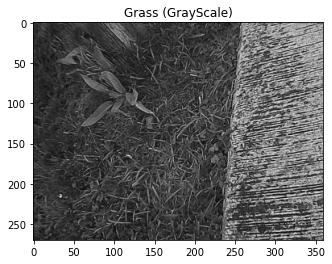

In [25]:
from skimage import io, color
import numpy as np
im = io.imread("2074811_rgbimage.jpg")     
im_gray = color.rgb2gray(im)

import matplotlib.pylab as plt 
plt.imshow(im_gray, cmap='gray')
plt.title('Grass (GrayScale)')

2. (5 points) Add 10\% salt and pepper noise to the grayscale image.

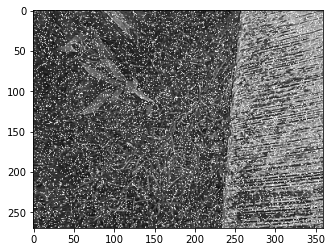

In [26]:
from skimage.morphology import disk 
from skimage.filters import median 
from skimage.util import random_noise, img_as_float
seed = 42
im_noise = random_noise(im_gray, seed=seed, mode='salt', amount=0.1)
plt.imshow(im_noise,cmap='gray')

3. (5 points) Denoise the noisy image by performing a Gaussian blur with `sigma=1` in the spatial domain. Display your denoised image.  

Points breakdown: 3 points for denosing the image, 2 points for displaying your image.

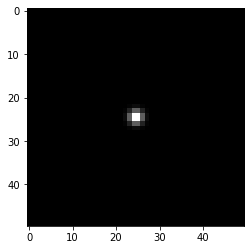

In [27]:
gauss_filt= np.outer(signal.gaussian(50, 1), signal.gaussian(50,1))
plt.imshow(gauss_filt,cmap='gray')

4. (5 points) Convert both the "clean" grayscale image (output of Q1.1) and noisy image (output of Q1.2) to the frequency domain and display the two FFT spectrums (FFT magnitude).

Points breakdown: 2 points for converting to the frequency domain, 3 point for displaying the FFT spectrum.

Text(0.5, 1.0, 'noise')

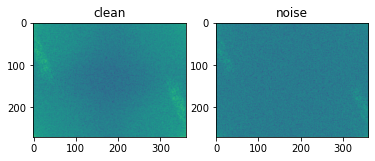

In [28]:
f_gray = np.fft.fft2(im_gray)
f_noise=np.fft.fft2(im_noise)
magnitude_spectrum_noise = np.log(np.abs(f_noise))
magnitude_spectrum_gray = np.log(np.abs(f_gray))
plt.subplot(1,2,1) 
plt.imshow(magnitude_spectrum_gray)
plt.title('clean')
plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum_noise)
plt.title('noise')

5. (5 points) Denoise the noisy image in frequency space by performing a Gaussian blur with `sigma=1` in the frequency domain. Convert your denoised solution back to the spatial domain. Display your denoised image. 

Points breakdown: 2 points for denoising. 2 points for converting your solution to the spatial domain,
1 point for displaying the image.

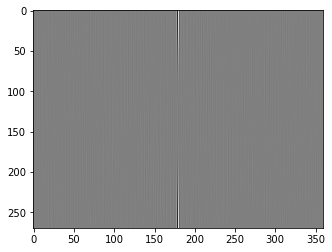

In [29]:
import scipy.signal as signal
from scipy.fftpack import fftn, ifftn, fftshift, ifftshift
from numpy.fft import fft

im_freq = fftn(f_noise)
gauss_kernel = np.outer(signal.gaussian(im_freq.shape[0], 1), signal.gaussian(im_freq.shape[1],1))
im_blurred1 = fft(gauss_kernel)
im_blurred1_freq = im_freq * im_blurred1
im_denoised_s =  ifftn(ifftshift(im_blurred1_freq)).real

plt.imshow(im_denoised_s,cmap='gray')


6. (10 points) Compare the time taken to run Gaussian blur operations in the spatial domain vs the frequency domain for the following 6 values of `sigma` - 1,2,4,16,32,64 and 128. Plot the time taken vs sigma for both spatial and frequency domain in the same plot. 

Points breakdown: 3 points for running the operations in the spatial domain. 3 points for running
the operations in the frequency domain. 1 point for the plot.

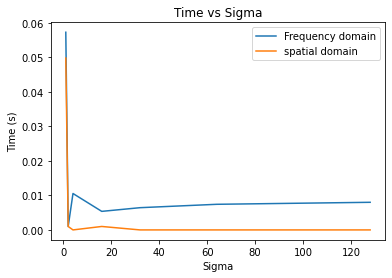

In [34]:
import pandas as pd
import time


sigmas = [1, 2, 4, 16, 32, 64, 128]

t1 = time.time()
im_freq = fftn(im)
gauss_kernel1 = np.outer(signal.gaussian(im_freq.shape[0], 1), signal.gaussian(im_freq.shape[1], 1))
t1_s=time.time()-t1
freq_kernel1 = fftn(ifftshift(gauss_kernel))
t1_t=time.time() - t1

t2 = time.time()
gauss_kernel2 = np.outer(signal.gaussian(im_freq.shape[0], 2), signal.gaussian(im_freq.shape[1], 2))
t2_s=time.time()-t2
freq_kernel2 = fftn(ifftshift(gauss_kernel2))
t2_t=time.time() - t2

t3 = time.time()
gauss_kernel3 = np.outer(signal.gaussian(im_freq.shape[0], 4), signal.gaussian(im_freq.shape[1], 4))
t3_s=time.time()-t3
freq_kernel3 = fftn(ifftshift(gauss_kernel3))
t3_t=time.time() - t3

t4 = time.time()
gauss_kernel4 = np.outer(signal.gaussian(im_freq.shape[0], 16), signal.gaussian(im_freq.shape[1], 16))
t4_s=time.time()-t4
freq_kernel4 = fftn(ifftshift(gauss_kernel4))
t4_t=time.time() - t4

t5 = time.time()
gauss_kernel5 = np.outer(signal.gaussian(im_freq.shape[0], 32), signal.gaussian(im_freq.shape[1], 32))
t5_s=time.time()-t5
freq_kernel5 = fftn(ifftshift(gauss_kernel5))
t5_t=time.time() - t5

t6 = time.time()
gauss_kernel6 = np.outer(signal.gaussian(im_freq.shape[0], 64), signal.gaussian(im_freq.shape[1], 64))
t6_s=time.time()-t6
freq_kernel6 = fftn(ifftshift(gauss_kernel6))
t6_t=time.time() - t6

t7 = time.time()
gauss_kernel7 = np.outer(signal.gaussian(im_freq.shape[0], 128), signal.gaussian(im_freq.shape[1], 128))
t7_s=time.time()-t7
freq_kernel7 = fftn(ifftshift(gauss_kernel7))
t7_t=time.time() - t7

t_f=[t1_t,t2_t,t3_t,t4_t,t5_t,t6_t,t7_t]
t_s=[t1_s,t2_s,t3_s,t4_s,t5_s,t6_s,t7_s]

df = pd.DataFrame({
    'sigmas': sigmas,
    't_f': t_f,
    't_s': t_s
})

plt.plot(df['sigmas'], df['t_f'], label='Frequency domain')
plt.plot(df['sigmas'], df['t_s'], label='spatial domain')

plt.xlabel('Sigma')
plt.ylabel('Time (s)')
plt.title('Time vs Sigma')


plt.legend()

plt.show()


   

Briefly comment on your plot. When `sigma` is larger, the kernel is larger. Which domain is perfered for for larger kernels? 

Points breakdown: 2 points for your comment on the plot and answering the question.

As the value of sigma incraeses, spatial domain takes less time as compared to frequency domain